In [38]:
import jax
import jax.numpy as jnp

# accuracy of estimation
theta = 0.000000000001


# gamma = 1 since its episodic task
gamma = 1

p_h = 0.4

state_values = jnp.zeros((99), dtype=jnp.float32)

possible_actions = jnp.arange(1, 51)

valid_states = jnp.arange(1, 100)

max_stakes = jnp.minimum(valid_states, 100 - valid_states)
actions = jnp.full((99, 50,), fill_value=possible_actions)
actions = jnp.clip(actions, 0, jnp.expand_dims(max_stakes, 1))


next_states_winning = jnp.expand_dims(valid_states, 1) + actions
next_states_losing = jnp.expand_dims(valid_states, 1) - actions

In [39]:
next_states_winning

Array([[  2,   2,   2, ...,   2,   2,   2],
       [  3,   4,   4, ...,   4,   4,   4],
       [  4,   5,   6, ...,   6,   6,   6],
       ...,
       [ 98,  99, 100, ..., 100, 100, 100],
       [ 99, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100]], dtype=int32)

In [40]:
next_states_losing

Array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 2,  1,  0, ...,  0,  0,  0],
       ...,
       [96, 95, 94, ..., 94, 94, 94],
       [97, 96, 96, ..., 96, 96, 96],
       [98, 98, 98, ..., 98, 98, 98]], dtype=int32)

In [90]:
import jax
import jax.numpy as jnp

# accuracy of estimation
theta = 0.000000000001


# gamma = 1 since its episodic task
gamma = 1

p_h = 0.4

state_values = jnp.zeros((99), dtype=jnp.float32)

possible_actions = jnp.arange(1, 51)

valid_states = jnp.arange(1, 100)


delta = theta
while delta >= theta:

    max_stakes = jnp.minimum(valid_states, 100 - valid_states)
    actions = jnp.full((99, 50,), fill_value=possible_actions)
    actions = jnp.clip(actions, 0, jnp.expand_dims(max_stakes, 1))


    next_states_winning = jnp.expand_dims(valid_states, 1) + actions
    next_states_losing = jnp.expand_dims(valid_states, 1) - actions
    

    rewards = jnp.where(next_states_winning == 100, 1.0, 0.0)


    next_state_values_winning = jnp.where((0 < next_states_winning) & (next_states_winning < 100), state_values[next_states_winning - 1], 0)
    next_state_values_losing = jnp.where((0 < next_states_losing) & (next_states_losing < 100), state_values[next_states_losing - 1], 0)
    next_state_values = next_state_values_winning * p_h + next_state_values_losing * (1 - p_h)


    new_state_values_by_action = p_h * rewards + gamma * next_state_values


    new_state_values = jnp.max(new_state_values_by_action, 1)

    delta = jnp.max(jnp.abs(state_values - new_state_values))

    state_values = new_state_values

    print(delta)

0.4
0.23999998
0.14400005
0.08640003
0.051839948
0.031103969
0.012441635
0.007465005
0.0029860735
0.0017917156
0.0010749102
0.00064504147
0.0002579093
0.00010317564
4.130602e-05
2.4795532e-05
9.953976e-06
5.841255e-06
2.3841858e-06
1.013279e-06
3.5762787e-07
2.3841858e-07
1.1920929e-07
1.1920929e-07
1.1920929e-07
5.9604645e-08
5.9604645e-08
1.1920929e-07
5.9604645e-08
0.0


In [91]:
policy = jnp.argmax(new_state_values_by_action,1)

In [92]:
policy = jnp.argmax(new_state_values_by_action,1) + 1


In [93]:
policy

Array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  9, 17,
       18,  6,  5, 21,  3,  2,  1, 25,  1,  2,  3, 29,  5,  6,  7,  8,  9,
       35, 36, 12, 12, 11, 10,  9,  8,  7, 44,  5,  4,  3,  2,  1, 50,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1, 25,  1,  2,  3, 21,  5, 19,  7,  8, 16, 15,
       14, 12, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],      dtype=int32)

In [94]:
import matplotlib.pyplot as plt

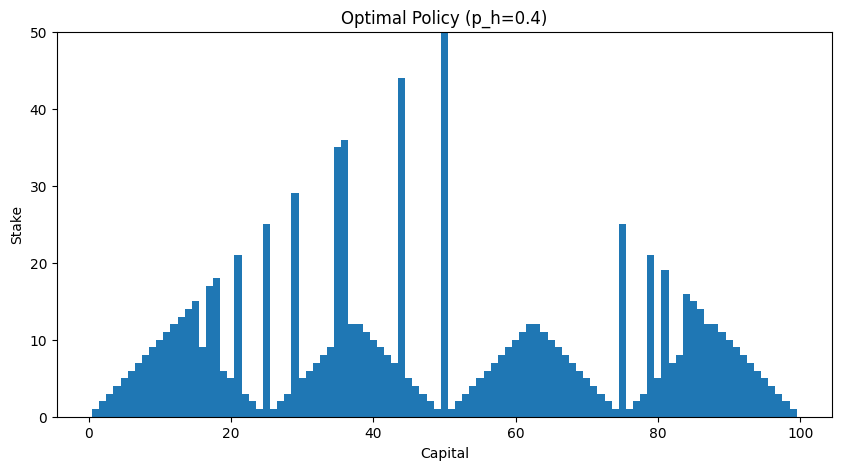

In [95]:
# Plot
plt.figure(figsize=(10, 5))
plt.bar(valid_states, policy, width=1.0) # Bar chart shows the discrete nature better
# plt.plot(policy)
plt.title(f"Optimal Policy (p_h={p_h})")
plt.xlabel("Capital")
plt.ylabel("Stake")
plt.ylim(0,50)
plt.show()

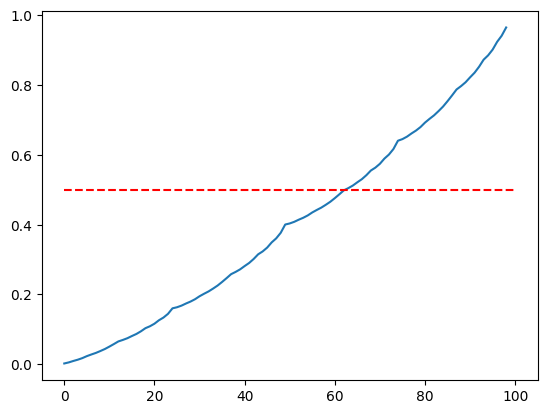

In [98]:
plt.plot(jnp.max(new_state_values_by_action, 1))
plt.hlines(0.5, 0, 100, color="red", linestyles="--")

# gemini 3 pro

Converged in 30 iterations.


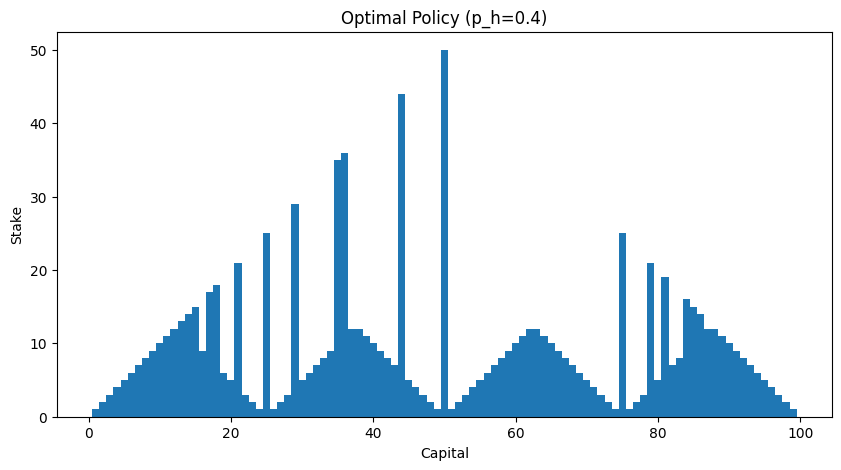

In [37]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Configuration
theta = 1e-12 # High precision
gamma = 1
p_h = 0.4

# Setup
state_values = jnp.zeros((99,), dtype=jnp.float32)
possible_actions = jnp.arange(1, 51) # Actions 1 to 50
valid_states = jnp.arange(1, 100)    # States 1 to 99

# Pre-calculate Max Stakes for every state
# State 1 -> Max 1. State 99 -> Max 1. State 50 -> Max 50.
max_stakes = jnp.minimum(valid_states, 100 - valid_states)

iteration = 0
delta = theta + 1

while delta > theta:
    # 1. Create Action Grid (99 states x 50 actions)
    actions = jnp.full((99, 50), fill_value=possible_actions)
    
    # 2. Masking (The robust fix)
    # Instead of clipping, we create a mask for invalid actions
    # If action > max_stake, it's invalid.
    valid_action_mask = actions <= jnp.expand_dims(max_stakes, 1)
    
    # Calculate Next States (for ALL actions, even invalid ones for now)
    next_s_win = valid_states[:, None] + actions
    next_s_lose = valid_states[:, None] - actions

    # 3. Value Lookups
    # If Win: 100->0(reward separate), 1..99->V(s), >100->0
    v_win = jnp.where(next_s_win == 100, 0.0, 
              jnp.where((next_s_win > 0) & (next_s_win < 100), 
                        state_values[jnp.clip(next_s_win, 1, 99) - 1], 0.0))
    
    # If Lose: 0->0, 1..99->V(s)
    v_lose = jnp.where(next_s_lose == 0, 0.0, 
               state_values[jnp.clip(next_s_lose, 1, 99) - 1])

    rewards = jnp.where(next_s_win == 100, 1.0, 0.0)

    # 4. Bellman Update
    # Expected Value = p_h * (R + V_win) + (1-p_h) * (0 + V_lose)
    action_values = p_h * (rewards + gamma * v_win) + (1 - p_h) * (gamma * v_lose)

    # 5. Apply Mask
    # Set invalid actions to -infinity so max() never picks them
    action_values = jnp.where(valid_action_mask, action_values, -jnp.inf)

    new_state_values = jnp.max(action_values, axis=1)
    
    delta = jnp.max(jnp.abs(state_values - new_state_values))
    state_values = new_state_values
    iteration += 1
    
    if iteration % 100 == 0:
        print(f"Iter {iteration}, Delta: {delta}")

print(f"Converged in {iteration} iterations.")

# Get Policy
# argmax returns index 0..49. We want Action 1..50.
policy = jnp.argmax(action_values, axis=1) + 1 

# Plot
plt.figure(figsize=(10, 5))
plt.bar(valid_states, policy, width=1.0) # Bar chart shows the discrete nature better
plt.title(f"Optimal Policy (p_h={p_h})")
plt.xlabel("Capital")
plt.ylabel("Stake")
plt.show()